## Step 1: Install Required Libraries
In this step, we install the necessary libraries for data processing, model training, and visualization. These include:
- `numpy`: A library for numerical computations.
- `river`: For implementing Very Fast Decision Trees (VFDT) and online machine learning.
- `boto3`: For accessing AWS S3 to load data.
- `tqdm`: For displaying progress bars during iterative processes.

In [2]:
#!pip install numpy
#!pip install river
#!pip install boto3
#!pip install tqdm

## Step 2: Import Libraries and Initialize Global Variables
In this step, we import the necessary libraries for handling data, accessing AWS S3, and managing progress bars during file downloads.

- `os`: For handling file paths.
- `pandas`: For loading and processing CSV files into dataframes.
- `boto3`: For accessing and downloading files from AWS S3.
- `StringIO`: For handling CSV content in-memory.
- `tqdm`: For displaying progress bars during file downloads.

We also declare `data` as a global variable to store the loaded dataset for further processing.

In [3]:
import os
import pandas as pd
import boto3
from io import StringIO
from tqdm import tqdm  # For progress bar

# Declare `data` as a global variable
data = None

## Step 3: Define Functions to Load Data
We define two functions to load the dataset:
1. **`load_local_file()`**:
   - Loads a CSV file from the local system using `pandas.read_csv`.
   - Displays a preview of the data.

2. **`load_s3_file_direct()`**:
   - Downloads a CSV file from AWS S3 using the `boto3` library.
   - Displays a progress bar while downloading the file.
   - Loads the downloaded CSV into a Pandas dataframe.

### Key Points:
- The AWS S3 credentials (`aws_access_key_id` and `aws_secret_access_key`) and bucket details are hardcoded in this example.
- The function uses a `tqdm` progress bar to provide feedback during the download.

In [4]:
def load_local_file():
    global data  # Declare as global to make it accessible outside the function
    csv_file_path = r"C:\Users\dell\Downloads\stream-analytics-all-data.csv"
    if os.path.exists(csv_file_path):
        try:
            data = pd.read_csv(csv_file_path, delimiter='|')
            print("Data loaded successfully from local file!")
            print(data.head())
        except Exception as e:
            print(f"Error reading the local file: {e}")
    else:
        print("File does not exist. Please check the path and try again.")

def load_s3_file_direct():
    global data  # Declare as global to make it accessible outside the function
    aws_access_key_id = r"<aws-key>"
    aws_secret_access_key = r"<aws-secret-access-key>"
    bucket_name = "stream-analytics-g23ai2087"
    file_key = "stream-analytics-all-data.csv"
    
    try:
        # Create S3 client
        s3 = boto3.client(
            's3',
            aws_access_key_id=aws_access_key_id,
            aws_secret_access_key=aws_secret_access_key,
        )
        
        # Get the object metadata to determine the file size
        obj_metadata = s3.head_object(Bucket=bucket_name, Key=file_key)
        file_size = obj_metadata['ContentLength']
        
        # Download the object with a progress bar
        response = s3.get_object(Bucket=bucket_name, Key=file_key)
        
        # Use a progress bar to monitor the download
        chunk_size = 10 * 1024 * 1024  # 10 MB chunks
        with tqdm(total=file_size, unit='B', unit_scale=True, desc="Downloading") as pbar:
            csv_content = ""
            for chunk in response['Body'].iter_chunks(chunk_size):
                csv_content += chunk.decode('utf-8')
                pbar.update(len(chunk))
        
        # Load the CSV content directly into pandas DataFrame
        data = pd.read_csv(StringIO(csv_content), delimiter='|')
        print("\nData loaded successfully from S3!")
        print(data.head())
    except Exception as e:
        print(f"Error loading file from S3: {e}")

## Step 4: Create a Menu for Data Loading
We define a `menu()` function to allow the user to select how they want to load the dataset:
1. **Load from Local File**: Select option `1` to load a local CSV file.
2. **Load from S3**: Select option `2` to load the CSV file directly from AWS S3.

### Key Points:
- The `menu()` function interacts with the user via the command line to get the choice.
- The `load_local_file()` or `load_s3_file_direct()` function is called based on the user's input.

In [5]:
def menu():
    print("\nMenu:")
    print("1. Load from local CSV file")
    print("2. Load directly from AWS S3")
    
    choice = input("Enter your choice (1/2): ").strip()
    if choice == '1':
        load_local_file()
    elif choice == '2':
        load_s3_file_direct()
    else:
        print("Invalid choice. Please enter 1, 2, or 3.")

## Step 5: Run the Menu
Finally, we run the `menu()` function to allow the user to choose the data loading method. After loading the dataset, the global `data` variable will contain the loaded DataFrame, which can be used for further analysis and processing.

In [6]:
# Run the menu
menu()


Menu:
1. Load from local CSV file
2. Load directly from AWS S3


Enter your choice (1/2):  1


Data loaded successfully from local file!
                                       sIP  \
0                          192.168.121.145   
1                           192.168.121.77   
2                           192.168.121.57   
3                          192.168.121.244   
4                           192.168.121.57   

                                       dIP  sPort  dPort  pro       packets  \
0                               10.0.40.53  59624   5723    6             7   
1                               10.0.40.53  49206   5723    6             7   
2                               10.0.40.53  60222   5723    6             8   
3                               10.0.40.53  56312   5723    6             6   
4                               10.0.40.20  60223    389    6            11   

             bytes     flags                       sTime      duration  \
0             2200  FS PA     2015/06/02T13:39:31.779000         0.012   
1             2200  FS PA     2015/06/02T13:39:44.244000  

## Step 6: Preview the Loaded Data
In this step, we display the first few rows of the loaded dataset to ensure it has been successfully loaded and is in the correct format.

### Key Points:
- The `data` variable contains the dataset loaded using the menu options (either from a local file or AWS S3).
- The `head()` function from Pandas is used to display the first few rows of the DataFrame.

In [7]:
# Display the first few rows to ensure it's loaded correctly
data.head()

,sIP,dIP,sPort,dPort,pro,packets,bytes,flags,sTime,duration,eTime,sen,Unnamed: 12
0,192.168.121.145,10.0.40.53,59624,5723,6,7,2200,FS PA,2015/06/02T13:39:31.779000,0.012,2015/06/02T13:39:31.791000,S5,NaN
1,192.168.121.77,10.0.40.53,49206,5723,6,7,2200,FS PA,2015/06/02T13:39:44.244000,0.014,2015/06/02T13:39:44.258000,S5,NaN
2,192.168.121.57,10.0.40.53,60222,5723,6,8,2240,FS PA,2015/06/02T13:39:44.369000,0.011,2015/06/02T13:39:44.380000,S5,NaN
3,192.168.121.244,10.0.40.53,56312,5723,6,6,2160,FS PA,2015/06/02T13:39:51.966000,0.015,2015/06/02T13:39:51.981000,S5,NaN
4,192.168.121.57,10.0.40.20,60223,389,6,11,2877,FS PA,2015/06/02T13:39:54.712000,0.047,2015/06/02T13:39:54.759000,S5,NaN


## Step 7: Explore the Dataset Headers
In this step, we count and list all the headers (columns) in the loaded dataset to understand its structure and ensure the expected fields are present.

### Key Points:
- **Count Headers**: The `len()` function is used to count the total number of columns in the dataset.
- **List Headers**: The `columns` attribute of the Pandas DataFrame provides the list of all column names.

In [8]:
# Count the number of headers
num_headers = len(data.columns)
print(f"Number of headers (columns): {num_headers}")

# List all headers
print("Headers in the CSV:")
print(data.columns.tolist())

Number of headers (columns): 13
Headers in the CSV:
['                                    sIP', '                                    dIP', 'sPort', 'dPort', 'pro', '     packets', '          bytes', '   flags', '                     sTime', '    duration', '                     eTime', 'sen', 'Unnamed: 12']


## Step 8: Dataset Overview and Summary Statistics
In this step, we examine the overall structure of the dataset and compute summary statistics for the numeric columns.

### Key Points:
- **`data.info()`**:
  - Displays a concise summary of the dataset, including:
    - Total number of rows and columns.
    - Data types of each column.
    - Number of non-null values for each column.
- **`data.describe()`**:
  - Provides summary statistics (e.g., count, mean, standard deviation, min, max) for all numeric columns in the dataset.
  - Helps in understanding the distribution and range of numeric variables.

In [9]:
# Display data information
data.info()

# Get a summary of numeric columns
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21216409 entries, 0 to 21216408
Data columns (total 13 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0                                       sIP  object 
 1                                       dIP  object 
 2   sPort                                    int64  
 3   dPort                                    int64  
 4   pro                                      int64  
 5        packets                             int64  
 6             bytes                          int64  
 7      flags                                 object 
 8                        sTime               object 
 9       duration                             float64
 10                       eTime               object 
 11  sen                                      object 
 12  Unnamed: 12                              float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ GB


,sPort,dPort,pro,packets,bytes,duration,Unnamed: 12
count,2.121641e+07,2.121641e+07,2.121641e+07,2.121641e+07,2.121641e+07,2.121641e+07,0.0
mean,3.418730e+04,1.197113e+04,1.328963e+01,4.829432e+00,7.823922e+02,2.350012e+00,NaN
std,2.457024e+04,2.240215e+04,5.302419e+00,2.322078e+02,4.679487e+04,2.718544e+01,NaN
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.300000e+01,0.000000e+00,NaN
25%,4.217000e+03,5.300000e+01,6.000000e+00,1.000000e+00,7.400000e+01,0.000000e+00,NaN
50%,4.707500e+04,5.300000e+01,1.700000e+01,2.000000e+00,1.470000e+02,0.000000e+00,NaN
75%,5.490900e+04,5.723000e+03,1.700000e+01,4.000000e+00,2.120000e+02,1.000000e-02,NaN
max,6.553500e+04,6.553500e+04,8.900000e+01,4.057340e+05,6.828201e+07,1.800922e+03,NaN


## Step 9: Filter Data for TCP Protocol
In this step, we filter the dataset to include only rows where the protocol is TCP. This is done by checking if the `pro` column has a value of `6`, which represents the TCP protocol.

### Key Points:
- **Filtering**:
  - The `data` DataFrame is filtered using a condition `data['pro'] == 6`.
  - The filtered dataset is stored in a new DataFrame named `tcp_data`.
- **Copy of Filtered Data**:
  - We use the `.copy()` method to avoid potential warnings about modifying the original DataFrame.
- **Preview**:
  - The first few rows of the filtered dataset are displayed using the `head()` function.

In [10]:
# Filter rows where protocol is TCP (pro == 6)
tcp_data = data[data['pro'] == 6].copy()

# Display the filtered data
print(tcp_data.head())

                                       sIP  \
0                          192.168.121.145   
1                           192.168.121.77   
2                           192.168.121.57   
3                          192.168.121.244   
4                           192.168.121.57   

                                       dIP  sPort  dPort  pro       packets  \
0                               10.0.40.53  59624   5723    6             7   
1                               10.0.40.53  49206   5723    6             7   
2                               10.0.40.53  60222   5723    6             8   
3                               10.0.40.53  56312   5723    6             6   
4                               10.0.40.20  60223    389    6            11   

             bytes     flags                       sTime      duration  \
0             2200  FS PA     2015/06/02T13:39:31.779000         0.012   
1             2200  FS PA     2015/06/02T13:39:44.244000         0.014   
2             2240  FS PA 

## Step 10: Clean Column Names in Filtered Data
In this step, we clean the column names of the filtered TCP dataset (`tcp_data`) to remove any leading or trailing spaces. Additionally, we rename specific columns for consistent naming.

### Key Points:
- **Strip Leading/Trailing Spaces**:
  - The `str.strip()` function is applied to `tcp_data.columns` to remove unnecessary spaces in column names.
- **Rename Columns**:
  - Specific columns are renamed for better readability and consistency using the `rename()` function with `inplace=True`.
- **Verification**:
  - The column names are displayed before and after cleaning to confirm the changes.


In [11]:
print(tcp_data.columns.tolist())
# Strip leading/trailing spaces from column names
tcp_data.columns = tcp_data.columns.str.strip()

# Verify again
print(tcp_data.columns.tolist())
tcp_data.rename(columns={' duration ': 'duration'}, inplace=True)

['                                    sIP', '                                    dIP', 'sPort', 'dPort', 'pro', '     packets', '          bytes', '   flags', '                     sTime', '    duration', '                     eTime', 'sen', 'Unnamed: 12']
['sIP', 'dIP', 'sPort', 'dPort', 'pro', 'packets', 'bytes', 'flags', 'sTime', 'duration', 'eTime', 'sen', 'Unnamed: 12']


## Step 11: Calculate Packets Per Second
In this step, we calculate a new column, `packets_per_second`, for the TCP dataset. This column represents the rate of packets handled per second for each row.

### Key Points:
- **Calculation**:
  - The formula for `packets_per_second` is:
    packets_per_second = packets/duration
  - If `duration` is `0`, the value is set to `0` to avoid division by zero.
- **Lambda Function**:
  - A lambda function is applied to each row of the DataFrame using the `apply()` method with `axis=1`.
- **Preview**:
  - The first few rows of the dataset, including the new column, are displayed to verify the calculation.

In [12]:
tcp_data['packets_per_second'] = tcp_data.apply(
    lambda row: row['packets'] / row['duration'] if row['duration'] > 0 else 0,
    axis=1
)

# Preview the results
print(tcp_data[['sIP', 'packets', 'duration', 'packets_per_second']].head())

                                       sIP  packets  duration  \
0                          192.168.121.145        7     0.012   
1                           192.168.121.77        7     0.014   
2                           192.168.121.57        8     0.011   
3                          192.168.121.244        6     0.015   
4                           192.168.121.57       11     0.047   

   packets_per_second  
0          583.333333  
1          500.000000  
2          727.272727  
3          400.000000  
4          234.042553  


## Step 12:  Train and Test Models for TCP Traffic Classification
In this step, we perform the following tasks to classify TCP traffic rates based on the calculated `packets_per_second`:

1. **Ensure Valid Duration Values**:
   - Replace `0` values in the `duration` column with `1` to avoid division by zero.

2. **Calculate `packets_per_second`**:
   - Compute the traffic rate as `packets` divided by `duration` for each row in the dataset.

3. **Define Traffic Classes**:
   - Create a new column `traffic_class` to group traffic rates into the following categories:
     - `Very Low`: 0-10 packets/sec
     - `Low`: 10-100 packets/sec
     - `Medium`: 100-1000 packets/sec
     - `High`: Above 1000 packets/sec

4. **Define Features and Target**:
   - Define `X` (features) as the `packets_per_second` column and `y` (target) as the `traffic_class` column.

5. **Split the Dataset**:
   - Split the dataset into training and testing sets using an 80-20 split, stratifying by `traffic_class`.

6. **Handle Missing Values**:
   - Use a `SimpleImputer` to replace missing values with the mean of the respective columns.

7. **Train Very Fast Decision Tree (VFDT)**:
   - Incrementally train the VFDT model using the `river` library on the training data.

8. **Predict with VFDT**:
   - Use the trained VFDT model to predict traffic classes on the test set and display a classification report.

9. **Train K-Nearest Neighbors (KNN)**:
   - Train the KNN classifier with 3 neighbors using the training data.

10. **Predict with KNN**:
    - Use the trained KNN model to predict traffic classes on the test set and display a classification report.

11. **Query Results for Specific Ranges**:
    - Query both VFDT and KNN models for traffic rates of `50 packets/sec` and `500 packets/sec` to demonstrate their predictions.

### Key Points:
- **VFDT**:
  - Handles incremental learning, suitable for online data streams.
- **KNN**:
  - Performs lazy evaluation, classifying data based on nearest neighbors.
- **Evaluation**:
  - Classification reports provide precision, recall, F1-score, and support for each class.


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from river.tree import HoeffdingTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the dataset (assuming tcp_data is already loaded)
# Ensure duration values are valid to avoid division by zero
tcp_data['duration'] = tcp_data['duration'].replace(0, 1)

# Step 2: Calculate packets_per_second if not already present
tcp_data['packets_per_second'] = tcp_data['packets'] / tcp_data['duration']

# Step 3: Define the traffic class based on packets_per_second
tcp_data['traffic_class'] = pd.cut(
    tcp_data['packets_per_second'],
    bins=[0, 10, 100, 1000, float('inf')],
    labels=['Very Low', 'Low', 'Medium', 'High']
)

# Step 4: Define features (X) and target (y)
X = tcp_data[['packets_per_second']].copy()
y = tcp_data['traffic_class']

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Step 6: Train the VFDT (HoeffdingTreeClassifier)
vfdt = HoeffdingTreeClassifier()
for i in range(len(X_train)):
    x = {'packets_per_second': X_train[i][0]}
    vfdt.learn_one(x, str(y_train.iloc[i]))

# Predict using VFDT
vfdt_predictions = [vfdt.predict_one({'packets_per_second': X_test[i][0]}) for i in range(len(X_test))]
y_test_str = y_test.astype(str)  # Convert y_test to string for comparison
print("VFDT Classification Report:")
print(classification_report(y_test_str, vfdt_predictions))

# Step 7: Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict using KNN
knn_predictions = knn.predict(X_test)
print("KNN Classification Report:")
print(classification_report(y_test, knn_predictions))

# Step 8: Query results for specific ranges
query1 = pd.DataFrame([[50]], columns=['packets_per_second'])
query2 = pd.DataFrame([[500]], columns=['packets_per_second'])

print(f"Query 1 (50 packets/sec) - VFDT: {vfdt.predict_one({'packets_per_second': 50})}")
print(f"Query 2 (500 packets/sec) - VFDT: {vfdt.predict_one({'packets_per_second': 500})}")
print(f"Query 1 (50 packets/sec) - KNN: {knn.predict(query1)}")
print(f"Query 2 (500 packets/sec) - KNN: {knn.predict(query2)}")

VFDT Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00     95743
         Low       1.00      1.00      1.00    152509
      Medium       1.00      1.00      1.00    691047
    Very Low       1.00      1.00      1.00    439027

    accuracy                           1.00   1378326
   macro avg       1.00      1.00      1.00   1378326
weighted avg       1.00      1.00      1.00   1378326

KNN Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00     95743
         Low       1.00      1.00      1.00    152509
      Medium       1.00      1.00      1.00    691047
    Very Low       1.00      1.00      1.00    439027

    accuracy                           1.00   1378326
   macro avg       1.00      1.00      1.00   1378326
weighted avg       1.00      1.00      1.00   1378326

Query 1 (50 packets/sec) - VFDT: Low
Query 2 (500 packets/sec) - VFDT: Medi

C:\Program Files\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Program Files\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


## Step 13: Visualize Traffic Class Distribution
In this step, we create a bar plot to visualize the distribution of the traffic classes (`traffic_class`) in the TCP dataset.

### Key Points:
- **Value Counts**:
  - The `value_counts()` function is used to count the occurrences of each traffic class.
- **Bar Plot**:
  - A bar plot is created using the `plot(kind='bar')` function in Pandas.
- **Visualization**:
  - The plot includes a title, labeled axes, and displays the number of nodes in each traffic class.

### Purpose:
- This visualization helps understand the distribution of traffic classes, enabling us to identify any imbalances in the dataset.

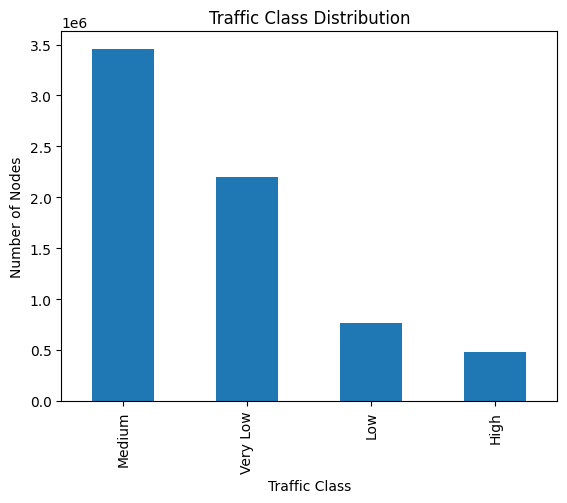

In [14]:
import matplotlib.pyplot as plt

# Plot traffic class distribution
tcp_data['traffic_class'].value_counts().plot(kind='bar')
plt.title("Traffic Class Distribution")
plt.xlabel("Traffic Class")
plt.ylabel("Number of Nodes")
plt.show()

## Step 14: Display Training and Testing Dataset Sizes
In this step, we display the number of samples in the training and testing datasets after splitting the original dataset.

### Key Points:
- **Training Samples**:
  - The size of the training dataset is determined using the `len()` function on `X_train`.
- **Testing Samples**:
  - The size of the testing dataset is determined using the `len()` function on `X_test`.
- **Purpose**:
  - This step ensures that the dataset is split correctly, and both training and testing datasets have the expected number of samples.

### Output:
- The number of training and testing samples is printed for verification.

In [15]:
print(f"Number of training samples: {len(X_train)}")
print(f"Number of test samples: {len(X_test)}")

Number of training samples: 5513304
Number of test samples: 1378326


## Step 15: Train and Test Optimized KNN Classifier
In this step, we train and test an optimized K-Nearest Neighbors (KNN) classifier on the TCP dataset to predict traffic classes.

### Key Points:
1. **Initialization**:
   - The KNN model is initialized with the following parameters:
     - `n_neighbors=3`: Considers the 3 nearest neighbors for classification.
     - `algorithm='ball_tree'`: Uses a Ball Tree data structure for efficient neighbor searches.
     - `n_jobs=-1`: Utilizes all available CPU cores for parallel computation.

2. **Training**:
   - The KNN model is trained using the `fit()` method on the training dataset (`X_train` and `y_train`).

3. **Testing on a Subset**:
   - A subset of the test dataset (first 100 samples) is used to evaluate the model for faster computation.

4. **Predictions**:
   - Predictions are made using the `predict()` method on the subset of test data (`subset_X_test`).

5. **Accuracy Score**:
   - The `accuracy_score()` function computes the classification accuracy, comparing the predicted values with the true labels (`subset_y_test`).

### Purpose:
- To evaluate the performance of the optimized KNN classifier in predicting traffic classes.

### Output:
- The accuracy of the KNN model on the subset of test data is printed.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize KNN with optimizations
knn = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree', n_jobs=-1)
knn.fit(X_train, y_train)

# Use a subset of X_test
subset_X_test = X_test[:100]
subset_y_test = y_test[:100]

# Predict on the subset
knn_predictions = knn.predict(subset_X_test)
knn_accuracy = accuracy_score(subset_y_test, knn_predictions)

print(f"KNN Accuracy (optimized): {knn_accuracy}")

KNN Accuracy (optimized): 1.0


## Step 16: Identify and Display Anomalous Nodes
In this step, we identify nodes with anomalous TCP traffic based on a predefined threshold for `packets_per_second`. Anomalous nodes are then displayed for further analysis.

### Key Points:
1. **Anomaly Threshold**:
   - Define a threshold value (`anomaly_threshold = 1000`) for identifying anomalies in traffic rates.

2. **Filter Anomalous Nodes**:
   - Filter rows in the dataset where the `packets_per_second` value exceeds the defined threshold.

3. **Display Anomalous Nodes**:
   - Display the source IP (`sIP`), destination IP (`dIP`), and `packets_per_second` values for the detected anomalies.

### Purpose:
- To detect and analyze nodes with unusually high TCP traffic rates, which may indicate abnormal behavior or events.

### Output:
- A list of anomalous nodes exceeding the threshold, along with their key attributes.

In [17]:
# Define the threshold for anomalies
anomaly_threshold = 1000

# Identify anomalous nodes
anomalies = tcp_data[tcp_data['packets_per_second'] > anomaly_threshold]

# Display anomalous nodes
print(f"Anomalies detected (packets_per_second > {anomaly_threshold}):")
print(anomalies[['sIP', 'dIP', 'packets_per_second']])


Anomalies detected (packets_per_second > 1000):
                                              sIP  \
1004                              192.168.141.189   
1451                                192.168.40.92   
1501                                192.168.40.25   
1773                                192.168.40.20   
3650                                192.168.40.51   
...                                           ...   
21216399                               10.0.40.21   
21216400                               10.0.40.21   
21216401                               10.0.40.21   
21216403                               10.0.40.21   
21216406                               10.0.40.21   

                                              dIP  packets_per_second  
1004                                   67.215.0.8         2000.000000  
1451                                   10.0.40.23         1500.000000  
1501                                   10.0.40.20         2000.000000  
1773                       

## Step 17: Count and Analyze Anomalies
In this step, we count the total number of anomalous nodes and analyze the distribution of their `packets_per_second` values.

### Key Points:
1. **Count Anomalies**:
   - Use the `shape[0]` attribute to get the total number of rows (anomalies) in the filtered dataset (`anomalies`).

2. **Analyze Distribution**:
   - Use the `describe()` method to generate summary statistics for the `packets_per_second` column of the anomalous nodes.
   - Key statistics include:
     - Count: Total number of anomalies.
     - Mean: Average `packets_per_second` value for anomalies.
     - Standard Deviation (std): Spread of the values.
     - Min/Max: Minimum and maximum traffic rates for anomalies.
     - Percentiles (25%, 50%, 75%): Quartiles of the data distribution.

### Purpose:
- To quantify and analyze the traffic characteristics of the identified anomalies.

### Output:
- Total number of anomalies detected.
- Summary statistics for the `packets_per_second` column in the anomalous data.

In [18]:
# Count the number of anomalies
num_anomalies = anomalies.shape[0]
print(f"Number of anomalies detected: {num_anomalies}")

# Analyze distribution of packets_per_second
print("Summary statistics for anomalies:")
print(anomalies['packets_per_second'].describe())

Number of anomalies detected: 478716
Summary statistics for anomalies:
count    478716.000000
mean       1512.644088
std         508.879721
min        1000.000000
25%        1250.000000
50%        1333.333333
75%        1500.000000
max       18899.478293
Name: packets_per_second, dtype: float64


## Step 18: Visualize Packets Per Second (Normal vs Anomalous Nodes)
In this step, we create a scatter plot to visualize the `packets_per_second` values for all nodes, distinguishing between normal and anomalous nodes.

### Key Points:
1. **Scatter Plot**:
   - Each point represents a node with its source IP (`sIP`) on the x-axis and its `packets_per_second` value on the y-axis.

2. **Normal Nodes**:
   - Plotted in the default color (blue) to represent nodes with traffic below the anomaly threshold.

3. **Anomalous Nodes**:
   - Highlighted in red to indicate nodes with traffic exceeding the anomaly threshold.

4. **Threshold Line**:
   - A horizontal line (`axhline`) is added to represent the anomaly threshold (`anomaly_threshold`).

5. **Customization**:
   - Labels, title, and legend are added for clarity.
   - Source IPs are rotated for better readability on the x-axis.

### Purpose:
- To visually distinguish between normal and anomalous nodes based on their `packets_per_second` values.

### Output:
- A scatter plot showing the distribution of normal and anomalous nodes.

C:\Users\dell\AppData\Local\Temp\ipykernel_12572\1329088018.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Program Files\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


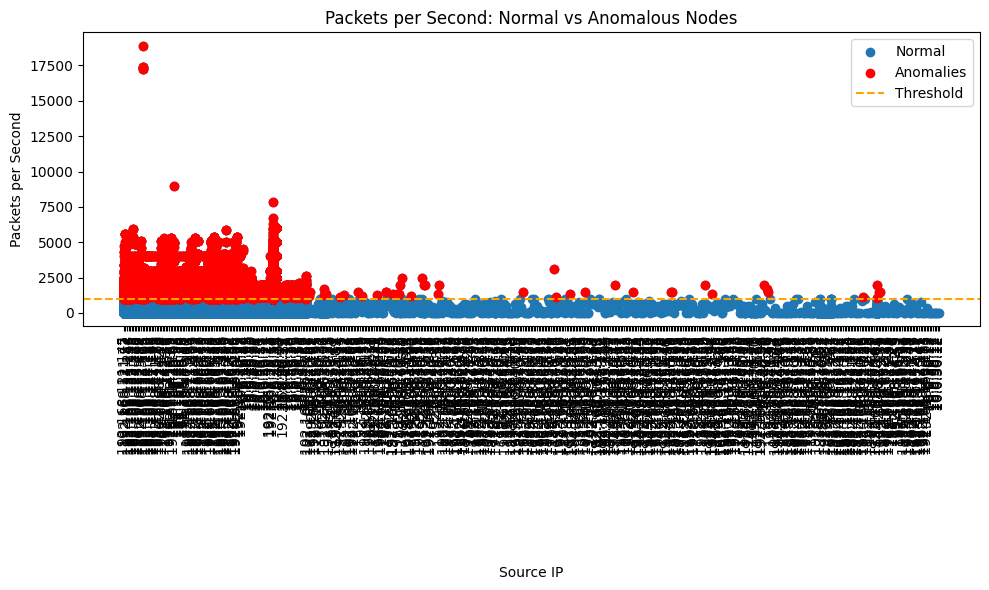

In [19]:
import matplotlib.pyplot as plt

# Scatter plot of packets_per_second
plt.figure(figsize=(10, 6))
plt.scatter(tcp_data['sIP'], tcp_data['packets_per_second'], label="Normal")
plt.scatter(anomalies['sIP'], anomalies['packets_per_second'], color='red', label="Anomalies")
plt.axhline(y=anomaly_threshold, color='orange', linestyle='--', label="Threshold")
plt.title("Packets per Second: Normal vs Anomalous Nodes")
plt.xlabel("Source IP")
plt.ylabel("Packets per Second")
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Step 19: Visualize Packets Per Second by IP Group (Normal vs Anomalous)
In this step, we group the TCP data by the first two segments of the IP address (e.g., `192.168`) and analyze the average `packets_per_second` within each group. The results are visualized in a bar chart, distinguishing between normal and anomalous groups.

### Key Points:
1. **Group by IP**:
   - The `ip_group` column is created by extracting the first two segments of the source IP (`sIP`).
   - Data is grouped by `ip_group`, and the average `packets_per_second` is calculated for each group.

2. **Identify Anomalous Groups**:
   - Groups with an average `packets_per_second` exceeding the anomaly threshold (`anomaly_threshold = 1000`) are marked as anomalous using a new column `is_anomaly`.

3. **Bar Plot**:
   - Normal groups are plotted in blue.
   - Anomalous groups are highlighted in red.
   - A horizontal orange line represents the anomaly threshold.

4. **Customization**:
   - The bar chart includes labels, a title, and a legend for clear interpretation.
   - The x-axis labels (IP groups) are rotated for readability.

### Purpose:
- To identify and visualize patterns in traffic behavior across different IP groups, highlighting groups with anomalous traffic rates.

### Output:
- A bar chart showing average `packets_per_second` for each IP group, distinguishing between normal and anomalous groups.

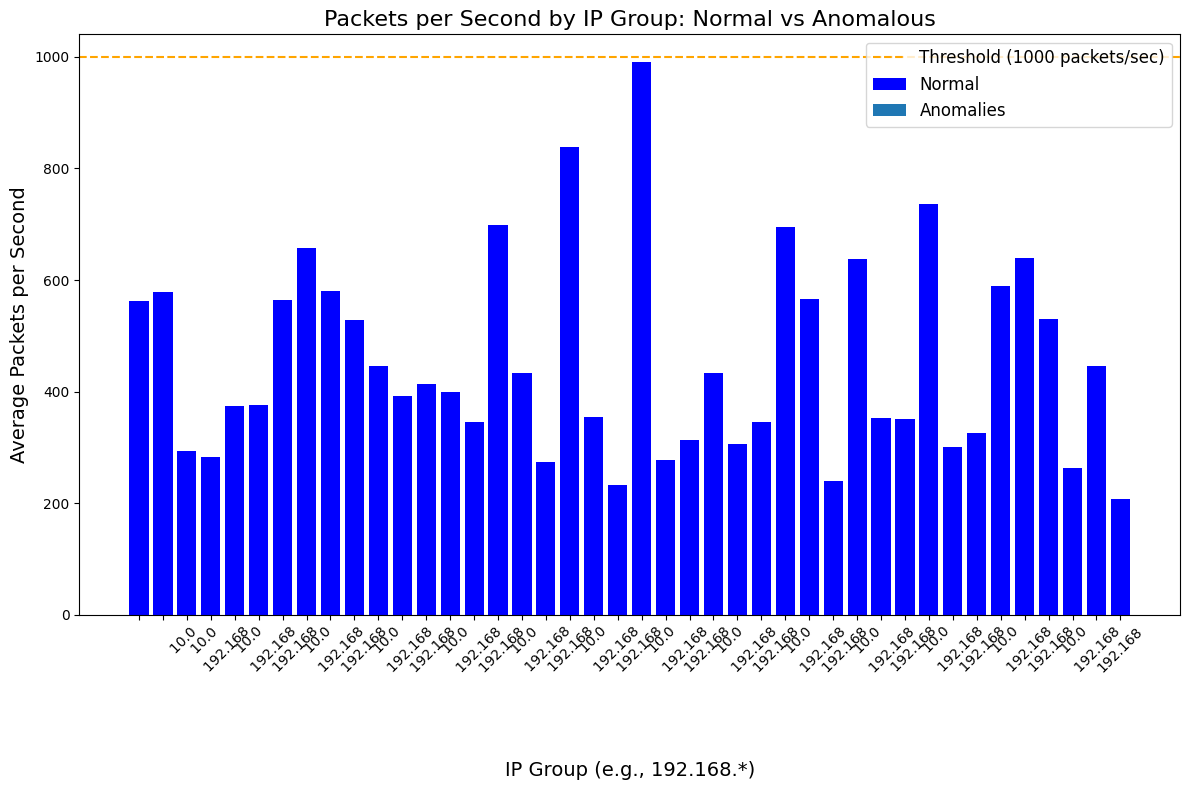

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by the first two segments of the IP address (e.g., '192.168')
tcp_data['ip_group'] = tcp_data['sIP'].apply(lambda x: '.'.join(x.split('.')[:2]))

# Aggregate packets per second by group
grouped_data = tcp_data.groupby('ip_group')['packets_per_second'].mean().reset_index()

# Identify anomalous groups
anomaly_threshold = 1000  # Example threshold for anomalies
grouped_data['is_anomaly'] = grouped_data['packets_per_second'] > anomaly_threshold

# Plot the grouped data
plt.figure(figsize=(12, 8))

# Normal groups
normal_groups = grouped_data[~grouped_data['is_anomaly']]
plt.bar(
    normal_groups['ip_group'],
    normal_groups['packets_per_second'],
    color='blue',  # Normal group color
    label="Normal",
)

# Anomalous groups
anomalous_groups = grouped_data[grouped_data['is_anomaly']]
plt.bar(
    anomalous_groups['ip_group'],
    anomalous_groups['packets_per_second'],
    color='red',  # Anomalous group color
    label="Anomalies",
)

# Add a threshold line
plt.axhline(
    y=anomaly_threshold,
    color='orange',
    linestyle='--',
    label=f"Threshold ({anomaly_threshold} packets/sec)",
)

# Title and labels
plt.title("Packets per Second by IP Group: Normal vs Anomalous", fontsize=16)
plt.xlabel("IP Group (e.g., 192.168.*)", fontsize=14)
plt.ylabel("Average Packets per Second", fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, fontsize=10)

# Add legend
plt.legend(loc="upper right", fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Step 20: Group and Count Anomalies by Source IP
In this step, we group the anomalous nodes by their source IP (`sIP`) and count the number of anomalies for each source IP.

### Key Points:
1. **Group by Source IP**:
   - Use the `groupby()` function to group the anomalies by the `sIP` column.

2. **Count Anomalies**:
   - Use the `size()` function to count the number of anomalies for each source IP.
   - Reset the index of the resulting DataFrame to create a new column `anomaly_count` that stores the counts.

3. **Sort Results**:
   - The results are sorted in descending order of the `anomaly_count` column to identify the most frequently anomalous source IPs.

4. **Output**:
   - A list of source IPs with their corresponding anomaly counts is displayed.

### Purpose:
- To identify and quantify the nodes (source IPs) contributing to anomalous traffic patterns.

### Output:
- A sorted list of source IPs with their anomaly counts, starting from the most anomalous.

In [21]:
# Group by source IP and count anomalies
anomalies_by_sIP = anomalies.groupby('sIP').size().reset_index(name='anomaly_count')
print("Anomalies by Source IP:")
print(anomalies_by_sIP.sort_values(by='anomaly_count', ascending=False))

Anomalies by Source IP:
                                         sIP  anomaly_count
3                                 10.0.40.21          52182
10                                10.0.40.53          50821
44                             192.168.70.10          26882
1                                 10.0.20.59          25355
34                             192.168.40.20          17370
..                                       ...            ...
143                               10.0.20.59              1
144                           192.168.121.77              1
145                          192.168.163.154              1
146                            192.168.50.12              1
147                            192.168.70.10              1

[148 rows x 2 columns]


## Step 21: Calculate Total and Percentage of Anomalous Packets
In this step, we calculate the total number of packets handled by anomalous nodes and determine their percentage contribution to the overall packets in the dataset.

### Key Points:
1. **Total Anomalous Packets**:
   - Use the `sum()` function on the `packets` column of the `anomalies` DataFrame to calculate the total number of packets handled by anomalous nodes.

2. **Percentage of Anomalous Packets**:
   - Calculate the percentage of packets handled by anomalous nodes relative to the total packets in the dataset:
     percentage = (total anomalous packets) / total packets in dataset) * 100

3. **Output**:
   - The percentage of anomalous packets is displayed, rounded to two decimal places.

### Purpose:
- To quantify the impact of anomalous nodes on the overall traffic in the dataset.

### Output:
- The total number of packets handled by anomalous nodes.
- The percentage of anomalous packets relative to the total traffic.

In [22]:
# Calculate total packets for anomalies
total_anomalous_packets = anomalies['packets'].sum()

# Calculate percentage of anomalous packets
percentage_anomalous_packets = (total_anomalous_packets / tcp_data['packets'].sum()) * 100
print(f"Percentage of anomalous packets: {percentage_anomalous_packets:.2f}%")


Percentage of anomalous packets: 9.67%
